![](scipy.png)

<br>

# Introduction
<br>

## SciPy
<br>
SciPy is a Python library used for scientific computing. With SciPy, Python is able to quickly solve various scientific and mathematical problems allowing users to perform complex data-processing with relative ease. SciPy is also capable of a wide range of data manipulation and visualizations. 

As SciPy is built upon the NumPy Package, it's basic data structure is a multidimensional array. This also means users can make use of Numpy keywords like ```help()``` & ```info()```. When using SciPy, it is convention to import NumPy and Matplotlib to start.

Scipy is divided into a number of subpackages that cover different forms of scientific computing, such as Fast Fourier Transforms, Signal & Image Processing, Linear Algebra and much more. We will investigate the Stats subpackage in more detail.  

[1]

In [1]:
# import necessary libraries 
import matplotlib.pyplot as plt
import numpy as np

# import pandas for handling dataframes
import pandas as pd
# import seaborn for visualisation
import seaborn as sns

#set size and style of graph
plt.rcParams["figure.figsize"] = (12,8)
plt.style.use("ggplot")

## SciPy.Stats
<br>
Statistics is a branch of mathematics that involves the collection, analysis and interpretation of data. SciPy.Stats is the statistical module within SciPy and is capable of a number of statistical functions such as probability distributions, summary and frequency statistics, statistical tests and much more. We shall investigate the statistical testing functionality of SciPy.Stats.

[2]

In [2]:
# import stats subpackage from SciPy
from scipy import stats as ss

## Hypothesis tests
<br>
Hypothesis tests are used to determine whether the results of an experiement are true or have occured by chance. In statistics, hypothesis testing determines whether an input variable(s) has a statistically significant relationship with an output (target) variable. By default, it is assumed that there exists no relationship between the variables, this is known as the null hypothesis and the test will check the likelihood that the null hypothesis is true i.e. that there exists no relationship. The Alternative Hypothesis is the hypothesis suggested when the null hypothesis is false. The alternative hypothesis implies that there exists a relationship between the variables. 

P-Value is a measure of probability that the result of your experiment have occured by chance and is used to determine whether the null hypothesis is true or not. A threshold for the p-value called the significance level is set, below which the probability that the result of the experiment have occured by mere chance is so low that we can reject the null hypothesis. When we reject the null hypothesis, we fail to reject the alternative hypothesis and can infer that there is a likelihood that the alternative hypothesis is true. The significance level is usually set at 0.05.


[3][4][5][6][7]

## ANOVA

ANOVA stands for Analysis of Variance and is a type of hypothesis testing developed by Ronald Fisher in 1918. ANOVA shows whether there exists statistically significant differences between groups of data. This can be useful when you want to understand how the different groups of data interact. The null hypothesis for ANOVA is that the means of the different groups are equal. If there is a statistically significant result, then it means that the groups are unequal. The p-value will show whether the differences between your groups are statistically significant. ANOVA can determine that a difference between the groups exists but is unable to determine which of the groups it is that are different. To determining which of these groups differ from each other you can use a post hoc test.

ANOVA works by sampling each group and analysing the levels of variance within them. If there exisits a lot of variance within the groups, there is more chance that the variance is due to chance. The level of variance is determined by the spread of data away from the mean. ANOVA also considers the sample size and the differences between sample means

### One-way ANOVA

A one-way ANOVA will help determine whether there exists significant differences between the means of two or more independent groups, generally at least three groups are used. One-way ANOVA is closely related to regression analysis. 

By comparing the effects of the independent groups upon the mean of multiple dependent groups, you can begin to understand which of them has a connection to your dependent groups. The null hypothesis here is that no relationship exists between weight loss and diet type.


We shall perform one-way ANOVA on the Diet data set found here: https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv

This data set contains information on 76 separate people who undertook one of three diets, diets 1, 2 and 3. There is background information such as age, gender, and height. The aim of the study was to see which diet was best for losing weight.

[8][9][10][11][12]

In [3]:
#import our dataset using pandas from URL
df = pd.read_csv("https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv")
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


First step is to add a new column ```weightLoss```, which corresponds to the difference between the initial and final weights. This value will be the weightloss attained per observation.

In [4]:
# Declare a list that is to be converted into a column
weightLoss = df['pre.weight'] - df['weight6weeks']
 
# create a new column called for weightLoss 
df['weightLoss'] = weightLoss
 
# Observe the result
df.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightLoss
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7


### Assumptions 


When performing ANOVA testing, there are certain assumptions that your data must meet. If your data doesn't meet these assumptions, then it is not appropriate to use ANOVA as the results will be unreliable. For one-way ANOVA there are 6 assumptions to be met. 

[4][9]

**Assumption 1**: Continuous Dependent Variable.

The first assumption is that the dependent variable is a continuous, numerical value.

In [5]:
# The dependent variable is weight loss
dependent = df['weightLoss']
dependent

0     0.0
1     0.0
2     3.8
3     6.0
4     0.7
     ... 
73    2.8
74    4.1
75    5.3
76    9.2
77    6.1
Name: weightLoss, Length: 78, dtype: float64

In [6]:
dependent.dtype

dtype('float64')

We can see that the variable weightloss, our dependent, is indeed a continuous numerical value. 

**Assumption 1:** True

***

**Assumption 2**: Categorical Independent Variable.

Assumption 2 states that the independent variables must be categorical. Instances of the data can be part of multple categorical variable. Typically, a one-way ANOVA is used when you have three or more independent categorical variables.

In [7]:
# The independent variable
independent = df['Diet']
independent

0     2
1     2
2     1
3     1
4     1
     ..
73    3
74    3
75    3
76    3
77    3
Name: Diet, Length: 78, dtype: int64

In [8]:
independent.unique()

array([2, 1, 3])

We can see that our independent variables are 3 categorical variables represented by ```1```, ```2``` & ```3```.

**Assumption 2**: True

***

**Assumption 3**: Independence of Observations.

Each observation should be independent meaning there shoud be no relationship between the observations in each group or between the groups themselves. The same observations cannot reappear with the dataset. This assumption is a consideration for the design of the experiment and is not something that can be tested for. If this assumption is not true, then ANOVA is not a suitable test. We know that our dataset contains 78 separate participants which fulfils assumption 3.

**Assumption 3**: True

***

**Assumption 4**: No Significant Outliers

There should be no significant outliers within the dataset meaning that there are no data points that do not follow the usual pattern. Outliers can have a negative effect on the one-way ANOVA, reducing the validity of your results. 

To check for outliers we will use a boxplot. A boxplot helps to visualize outliers and determine their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed. [13][14]

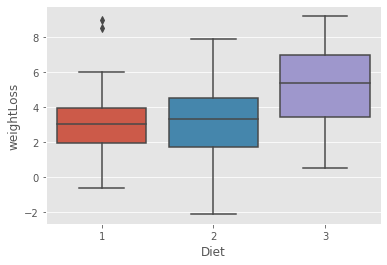

In [9]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(y = dependent, x = independent)
plt.show()

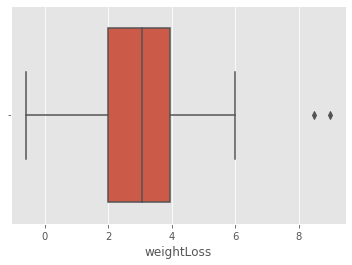

In [10]:
weightLoss_diet_1 = dependent[independent == 1]
sns.boxplot( x = weightLoss_diet_1)

Looking at the boxplot we can see there exists 2 univariant outliers for Diet type 1. Lets investigate these further to see if they significantly impact out dataset. We can use to Tukey's method to investigate these possible outliers futher.

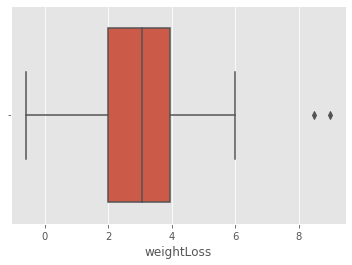

In [11]:
weightLoss_diet_1 = dependent[independent == 1]
sns.boxplot( x = weightLoss_diet_1)

In [12]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss
        
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "Diet")
print(probable_outliers_tm)
print(possible_outliers_tm)

[]
[]


Tukey's method did not determine any significant outliets

**Assumption 4**: True

[15][16][17]

***

**Assumption 5**: Normality of Data.

Your dependent variable should be approximately normally distributed, fall into a bell shaped curve, for each category of the independent variable. One-way ANOVA requires only approximately normal data so the data can be a little outside of normal and still provide valid results. We can easily visualise the distirbution of the data with a Kernel Density Plot (KDE).

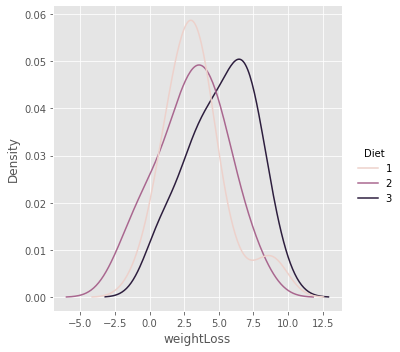

In [13]:
# KDE of the categorical groups
sns.displot(x=dependent, hue=independent, kind="kde")

All categorical variable appear to be normally distributed, but can test for normality using the Shapiro-Wilk test of normality.

In [14]:
#split the data according to diet type
weightLoss_diet_1 = dependent[independent == 1]
weightLoss_diet_2 = dependent[independent == 2]
weightLoss_diet_3 = dependent[independent == 3]

In [15]:
#call Shapiro-Wilks from Stats and run it on each diet type

shapiro1 = ss.shapiro(weightLoss_diet_1)
shapiro1

(0.9255314469337463, 0.07748671621084213)

In [16]:
shapiro2 = ss.shapiro(weightLoss_diet_2)
shapiro2

(0.9855913519859314, 0.961176335811615)

In [17]:
shapiro3 = ss.shapiro(weightLoss_diet_3)
shapiro3

(0.9601252675056458, 0.37203603982925415)

After running the Shapiro-Wilks test on our diet types, we see a p-value greater than 0.05 for each and therefore the data is normal.

**Assumption 5**: True

[18][19]

***



**Assumption 6**: Homogeneity of Variances.

There needs to be homogeneity of variances, meaning the bell shaped curves of distirbution needs to be similarly shaped. 

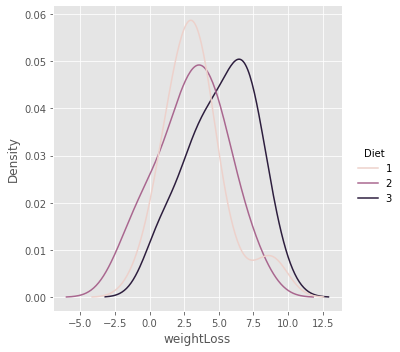

In [18]:
# KDE of the categorical groups
sns.displot(x=dependent, hue=independent, kind="kde")

 This assumption appears to be true but can be test using Levene's test for homogeneity of variances. The Levene test tests the null hypothesis that all input samples are from populations with equal variances. 

In [19]:
ss.levene(
    weightLoss_diet_1,
    weightLoss_diet_2,
    weightLoss_diet_1)

LeveneResult(statistic=0.6493543435733202, pvalue=0.5254146994556292)

Similarly Bartlett’s test can also test for homogeneity of variances.



In [20]:
ss.bartlett(
    weightLoss_diet_1,
    weightLoss_diet_2,
    weightLoss_diet_3)

BartlettResult(statistic=0.337454630479139, pvalue=0.8447392194944549)

For both test we see a significance level above 0.05 meaning the bell curves are similarly shaped.

**Assumption 6**: True

 
[20][21][22]

***

### One Way Anova

As all 6 assumptions are met, we can say one-way ANOVA is an appropirate test for our dataset. The one-way ANOVA will test the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes. The return of this model is a statistic value, F and the p-value 

[23][24][25]

In [21]:
ss.f_oneway(
    weightLoss_diet_1,
    weightLoss_diet_2,
    weightLoss_diet_3)

F_onewayResult(statistic=6.197447453165349, pvalue=0.0032290142385893524)

### Interpretation

To determine whether the null hypothesis is true, whether there exists a statistically significant difference between the means, the p-value is compared to the significance level. Usually, significance level is denoted as α (alpha). The significance level used here is 0.05.
P-value ≤ α: The differences between some of the means are statistically significant. If the p-value is less than or equal to the significance level, you reject the null hypothesis and conclude.

P-value > α: The differences between the means are not statistically significant. If the p-value is greater than the significance level, you do not have enough evidence to reject the null hypothesis. The null hypothesis here is that no relationship exists between weight loss and diet type. [26]

# Reference 
***

[1] https://scipy.github.io/devdocs/tutorial/general.html

[2] https://docs.scipy.org/doc/scipy/reference/stats.html

[3] https://www.investopedia.com/terms/s/statistics.asp

[4] https://towardsdatascience.com/anova-t-test-and-other-statistical-tests-with-python-e7a36a2fdc0c

[5] https://www.youtube.com/watch?v=8JIe_cz6qGA

[6] https://www.analyticsvidhya.com/blog/2021/07/a-simple-guide-to-hypothesis-testing-for-dummies/

[7] https://www.investopedia.com/terms/p/p-value.asp

[8] https://www.qualtrics.com/uk/experience-management/research/anova/

[9] https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

[10] https://bioinformatics-core-shared-training.github.io/linear-models-r/anova.html

[11] https://www.youtube.com/watch?v=9cnSWads6oo

[12] https://www.dummies.com/article/academics-the-arts/science/biology/the-basic-idea-of-an-analysis-of-variance-anova-149339

[13] https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

[14] https://en.wikipedia.org/wiki/Box_plot

[15] https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755

[16] https://en.wikipedia.org/wiki/Tukey%27s_range_test

[17] https://statisticsbyjim.com/basics/outliers/

[18] https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php

[19] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html?highlight=shapiro#scipy.stats.shapiro

[20] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

[21] https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php

[22] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html

[23] https://www.youtube.com/watch?v=9cnSWads6oo

[24] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

[25] https://www.pythonfordatascience.org/anova-python/

[26] https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/anova/how-to/one-way-anova/interpret-the-results/all-statistics-and-graphs/